<a href="https://colab.research.google.com/github/aspirli2901/for-me/blob/main/Ex9_Easy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 9 - Easy problem
##  SR15M3
*Repeat the divorce data measurement error models, but this time double the standard errors.
Can you explain how doubling the standard errors impacts inference?*

## Discussion of results

From comparing the graphs, we can notice that after doubling the SE, we can clearly see the convergence of the data to a more firm model. This is not surprising and not necessarily good.

To my understanding, big errors are making the data more flexible for adjustment to a model, what creates a little bit of a biased model.

## Setup

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
import scipy.stats as stats

In [ ]:
RANDOM_SEED = 1234
np.random.seed(RANDOM_SEED)
#rng = default_rng(RANDOM_SEED)

## Load data

In [ ]:
d = pd.read_csv("/content/WaffleDivorce.csv", ";")

<ipython-input-7-be51adaa4f35>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  d = pd.read_csv("/content/WaffleDivorce.csv", ";")


##  First part
Original models

In [ ]:
def standardize(series):
    """Standardize a pandas series"""
    return (series - series.mean()) / series.std()

In [ ]:
D_obs = standardize(d["Divorce"])
D_sd = d["Divorce SE"] / d["Divorce"].std()
M = standardize(d["Marriage"])
A = standardize(d["MedianAgeMarriage"])
N = len(d)

In [ ]:

with pm.Model() as m15_1:
    sigma = pm.Exponential("sigma", 1)
    bM = pm.Normal("bM", 0, 0.5)
    bA = pm.Normal("bA", 0, 0.5)
    a = pm.Normal("a", 0, 0.2)

    mu = a + bA * A + bM * M  # linear model to assess A -> D
    D_true = pm.Normal("D_true", mu, sigma, shape=N)  # distribution for true values

    D = pm.Normal("D_obs", D_true, D_sd, observed=D_obs)  # distribution for observed values

    idata_m15_1 = pm.sample(return_inferencedata=True, random_seed=RANDOM_SEED)

In [ ]:

az.summary(idata_m15_1, var_names=["~D_true"], round_to=2)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bM,0.06,0.17,-0.25,0.37,0.0,0.0,1390.88,1491.71,1.0
bA,-0.61,0.16,-0.91,-0.31,0.0,0.0,1429.99,1554.26,1.0
a,-0.05,0.09,-0.22,0.13,0.0,0.0,2161.05,1434.72,1.0
sigma,0.59,0.10,0.41,0.78,0.0,0.0,696.60,960.19,1.0


In [ ]:
D_obs = standardize(d["Divorce"])
D_sd = d["Divorce SE"] / d["Divorce"].std()
M_obs = standardize(d["Marriage"])
M_sd = d["Marriage SE"] / d["Marriage"].std()
A = standardize(d["MedianAgeMarriage"])
N = len(d)



In [ ]:
with pm.Model() as m15_2:
    sigma = pm.Exponential("sigma", 1)
    bM = pm.Normal("bM", 0, 0.5)
    bA = pm.Normal("bA", 0, 0.5)
    a = pm.Normal("a", 0, 0.2)

    M_true = pm.Normal("M_true", 0, 1, shape=N)  # distribution for true M values
    mu = a + bA * A + bM * M_true  # linear model
    D_true = pm.Normal("D_true", mu, sigma, shape=N)  # distribution for true D values

    D = pm.Normal("D_obs", D_true, D_sd, observed=D_obs)  # distribution for observed D values
    M = pm.Normal("M_obs", M_true, M_sd, observed=M_obs)  # distribution for observed M values

    idata_m15_2 = pm.sample(return_inferencedata=True, random_seed=RANDOM_SEED)


In [ ]:

az.summary(idata_m15_2, var_names=["~D_true", "~M_true"], round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bM,0.19,0.20,-0.19,0.59,0.01,0.0,839.55,1173.58,1.0
bA,-0.55,0.16,-0.84,-0.26,0.00,0.0,1114.42,1697.46,1.0
a,-0.04,0.09,-0.22,0.14,0.00,0.0,2326.38,1428.36,1.0
sigma,0.56,0.11,0.38,0.77,0.00,0.0,729.60,438.49,1.0


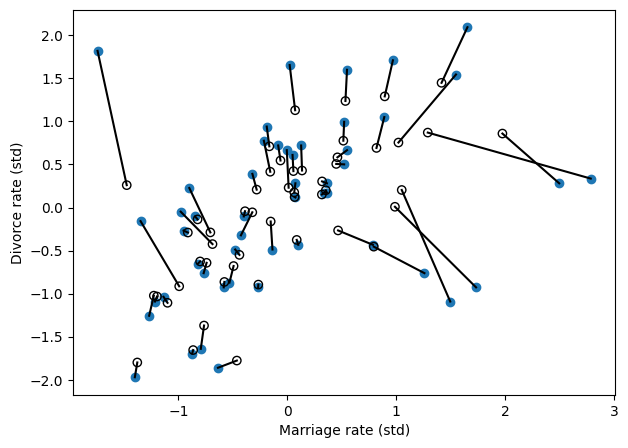

In [ ]:

D_true = idata_m15_2.posterior["D_true"].mean(dim=["chain", "draw"])
M_true = idata_m15_2.posterior["M_true"].mean(dim=["chain", "draw"])

fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(M_obs, D_obs)
ax.scatter(M_true, D_true, edgecolor="k", facecolor="none")
ax.plot([M_obs, M_true], [D_obs, D_true], c="k")

ax.set_xlabel("Marriage rate (std)")
ax.set_ylabel("Divorce rate (std)");

##  Second part
Double the standart error

In [ ]:
D_obs = standardize(d["Divorce"])
D_sd = 2*d["Divorce SE"] / d["Divorce"].std()
M = standardize(d["Marriage"])
A = standardize(d["MedianAgeMarriage"])
N = len(d)

In [ ]:

with pm.Model() as m15_1:
    sigma = pm.Exponential("sigma", 1)
    bM = pm.Normal("bM", 0, 0.5)
    bA = pm.Normal("bA", 0, 0.5)
    a = pm.Normal("a", 0, 0.2)

    mu = a + bA * A + bM * M  # linear model to assess A -> D
    D_true = pm.Normal("D_true", mu, sigma, shape=N)  # distribution for true values

    D = pm.Normal("D_obs", D_true, D_sd, observed=D_obs)  # distribution for observed values

    idata_m15_1 = pm.sample(return_inferencedata=True, random_seed=RANDOM_SEED)

In [ ]:
az.summary(idata_m15_1, var_names=["~D_true"], round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bM,0.21,0.18,-0.11,0.55,0.02,0.01,135.66,449.03,1.02
bA,-0.64,0.15,-0.90,-0.32,0.01,0.01,175.64,464.87,1.01
a,-0.10,0.09,-0.26,0.07,0.01,0.01,158.02,269.84,1.03
sigma,0.16,0.09,0.04,0.33,0.01,0.01,52.91,53.36,1.02


In [ ]:
D_obs = standardize(d["Divorce"])
D_sd = 2*d["Divorce SE"] / d["Divorce"].std()
M_obs = standardize(d["Marriage"])
M_sd = 2*d["Marriage SE"] / d["Marriage"].std()
A = standardize(d["MedianAgeMarriage"])
N = len(d)

In [ ]:
with pm.Model() as m15_2:
    sigma = pm.Exponential("sigma", 1)
    bM = pm.Normal("bM", 0, 0.5)
    bA = pm.Normal("bA", 0, 0.5)
    a = pm.Normal("a", 0, 0.2)

    M_true = pm.Normal("M_true", 0, 1, shape=N)  # distribution for true M values
    mu = a + bA * A + bM * M_true  # linear model
    D_true = pm.Normal("D_true", mu, sigma, shape=N)  # distribution for true D values

    D = pm.Normal("D_obs", D_true, D_sd, observed=D_obs)  # distribution for observed D values
    M = pm.Normal("M_obs", M_true, M_sd, observed=M_obs)  # distribution for observed M values

    idata_m15_2 = pm.sample(return_inferencedata=True, random_seed=RANDOM_SEED)


In [ ]:
az.summary(idata_m15_2, var_names=["~D_true", "~M_true"], round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bM,0.31,0.22,-0.12,0.70,0.02,0.01,119.70,259.85,1.03
bA,-0.62,0.17,-0.89,-0.26,0.04,0.03,21.62,22.44,1.07
a,-0.11,0.11,-0.29,0.10,0.02,0.01,50.92,224.86,1.02
sigma,0.18,0.10,0.05,0.35,0.02,0.01,20.82,15.40,1.07


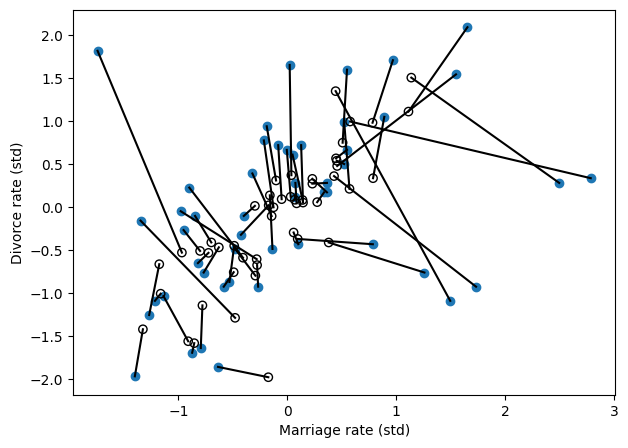

In [ ]:

D_true = idata_m15_2.posterior["D_true"].mean(dim=["chain", "draw"])
M_true = idata_m15_2.posterior["M_true"].mean(dim=["chain", "draw"])

fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(M_obs, D_obs)
ax.scatter(M_true, D_true, edgecolor="k", facecolor="none")
ax.plot([M_obs, M_true], [D_obs, D_true], c="k")

ax.set_xlabel("Marriage rate (std)")
ax.set_ylabel("Divorce rate (std)");